<a href="https://colab.research.google.com/github/salihakh/Intelligent-Airline-Analytics/blob/main/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clear the workspace


In [ ]:
rm(list=ls())
cat("\014")
install.packages("rpart.plot")
install.packages("caret")
install.packages("ROCit")
library(rpart)
library(rpart.plot)
library(caret)
library(dplyr)
library(reshape2)
library(ggplot2)
library(ROCit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 load in the data file into data.frame

In [ ]:
unzip("airline_passenger_satisfaction.csv.zip", exdir = ".")
airline <- read.csv("airline_passenger_satisfaction.csv", stringsAsFactors = FALSE)
summary(airline)

       ID            Gender               Age        Customer.Type     
 Min.   :     1   Length:129880      Min.   : 7.00   Length:129880     
 1st Qu.: 32471   Class :character   1st Qu.:27.00   Class :character  
 Median : 64940   Mode  :character   Median :40.00   Mode  :character  
 Mean   : 64940                      Mean   :39.43                     
 3rd Qu.: 97410                      3rd Qu.:51.00                     
 Max.   :129880                      Max.   :85.00                     
                                                                       
 Type.of.Travel        Class           Flight.Distance Departure.Delay  
 Length:129880      Length:129880      Min.   :  31    Min.   :   0.00  
 Class :character   Class :character   1st Qu.: 414    1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median : 844    Median :   0.00  
                                       Mean   :1190    Mean   :  14.71  
                                       3rd Qu.:1744    3rd 

Removing missing values

In [ ]:
airline <- na.omit(airline)

summary(airline)


       ID            Gender               Age        Customer.Type     
 Min.   :     1   Length:129487      Min.   : 7.00   Length:129487     
 1st Qu.: 32494   Class :character   1st Qu.:27.00   Class :character  
 Median : 64972   Mode  :character   Median :40.00   Mode  :character  
 Mean   : 64958                      Mean   :39.43                     
 3rd Qu.: 97416                      3rd Qu.:51.00                     
 Max.   :129880                      Max.   :85.00                     
 Type.of.Travel        Class           Flight.Distance Departure.Delay  
 Length:129487      Length:129487      Min.   :  31    Min.   :   0.00  
 Class :character   Class :character   1st Qu.: 414    1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median : 844    Median :   0.00  
                                       Mean   :1190    Mean   :  14.64  
                                       3rd Qu.:1744    3rd Qu.:  12.00  
                                       Max.   :4983    Max

In [ ]:
# Changing variables into factors

In [ ]:
airline$Gender <- as.factor(airline$Gender)
airline$Customer.Type <- as.factor(airline$Customer.Type)
airline$Type.of.Travel <- as.factor(airline$Type.of.Travel)
airline$Class <- as.factor(airline$Class)

In [ ]:
#columns_to_convert <- 8:21
# Convert columns 4 through 10 into factors
#for (col in columns_to_convert) {
#  airline[, col] <- factor(airline[, col])}

airline$Satisfaction <- as.factor(airline$Satisfaction)

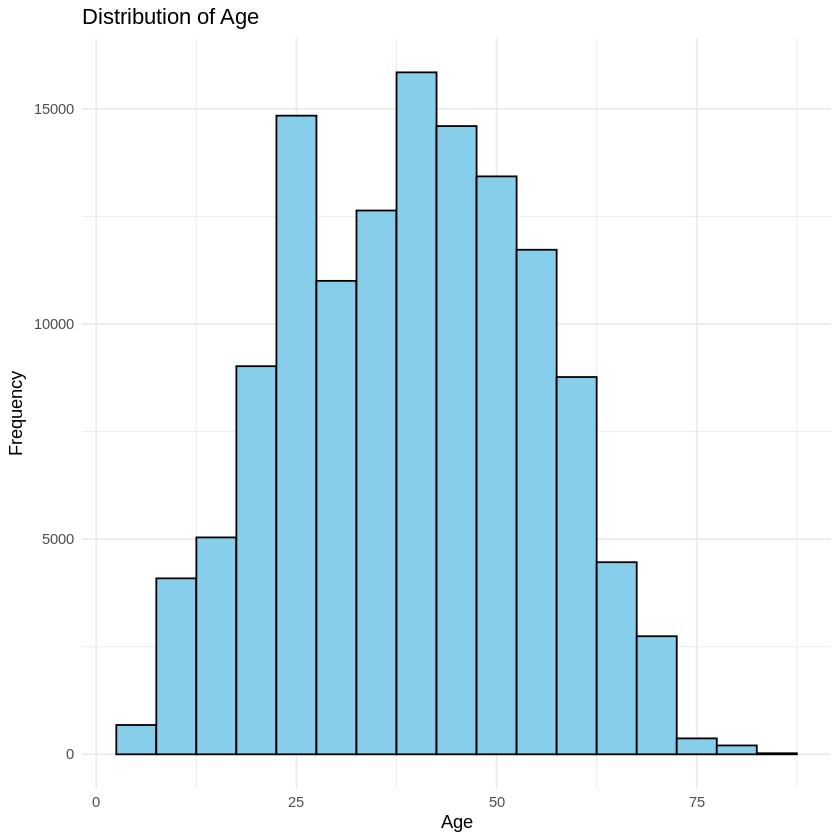

In [ ]:
#Below are some of the explanatory data analysis using Different Visualization Techniques
#### histograms for the distribution of numerical variables such as Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes

# Histogram for Age
ggplot(airline, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Age", x = "Age", y = "Frequency") +
  theme_minimal()

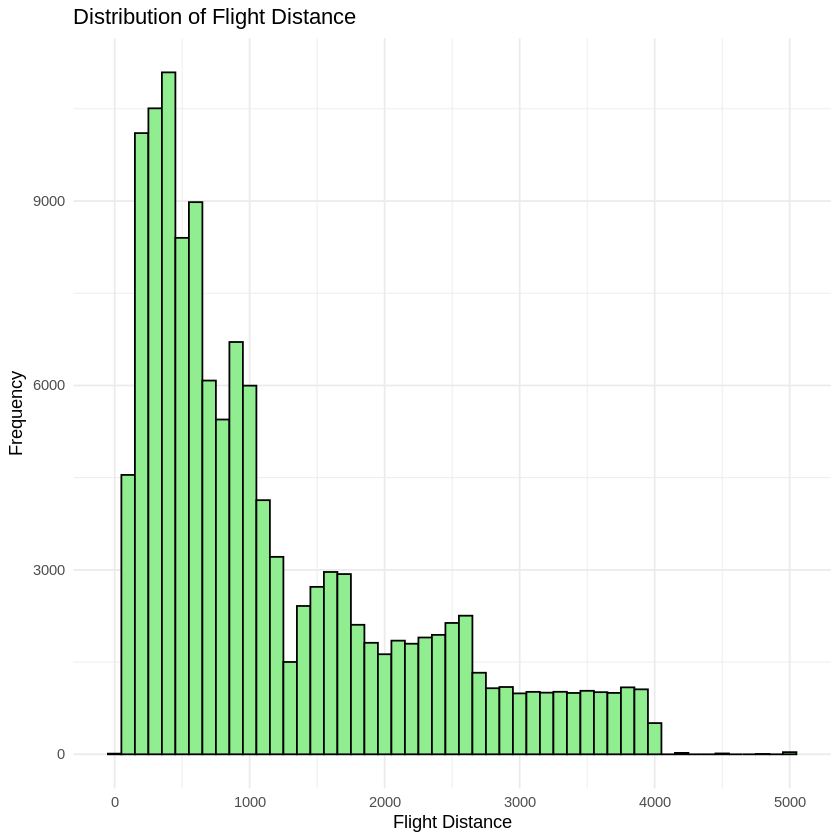

In [ ]:
# Histogram for Flight Distance
ggplot(airline, aes(x = Flight.Distance)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Flight Distance", x = "Flight Distance", y = "Frequency") +
  theme_minimal()

# Function to calculate percentages
calculate_percentages <- function(x) {
  return(prop.table(table(x)) * 100)
}

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


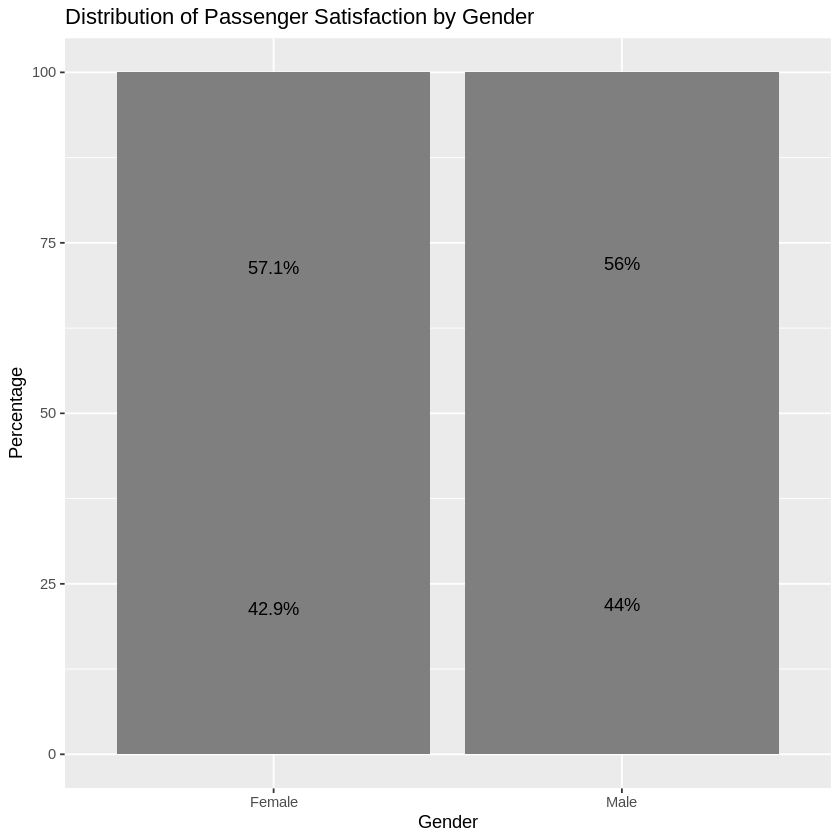

In [ ]:
### comparing the percentages of satisfied and neutral or dissatisfied passengers within categories like gender, type of travel and class.

# Create a summary dataframe with percentages
summary_data <- with(airline, prop.table(table(Gender, Satisfaction), margin = 1) * 100)

# Convert summary dataframe to long format
summary_data_long <- reshape2::melt(summary_data)

# Bar chart for Gender with percentages
ggplot(summary_data_long, aes(x = Gender, y = value, fill = Satisfaction)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(value, 1), "%")), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribution of Passenger Satisfaction by Gender",
       x = "Gender",
       y = "Percentage") +
  scale_fill_manual(values = c("satisfied" = "green", "neutral or dissatisfied" = "red"))

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


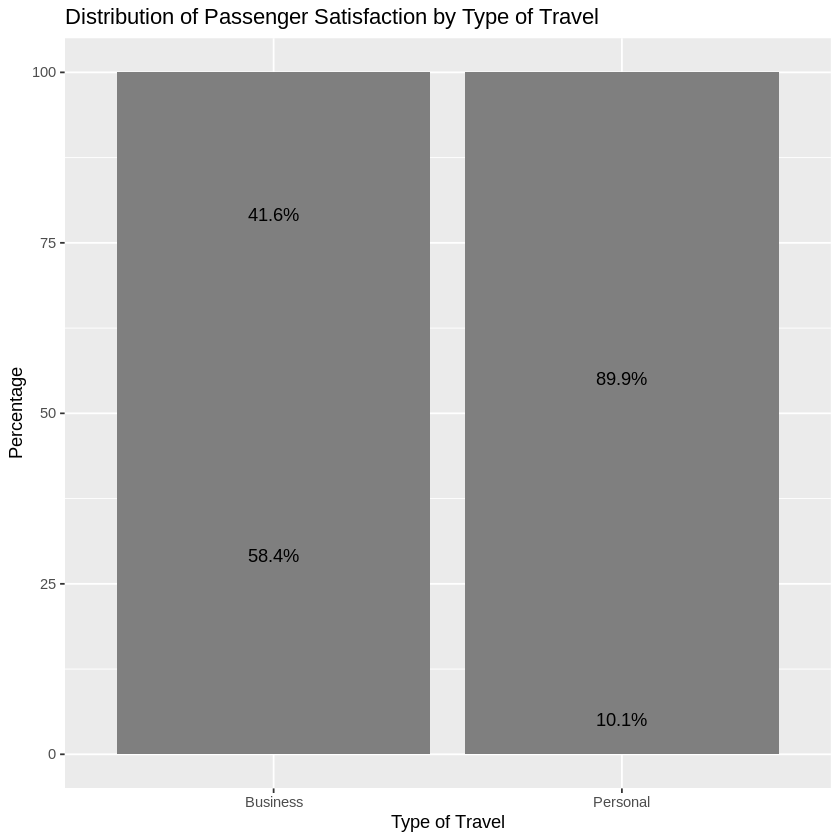

In [ ]:
summary_data_travel_type <- with(airline, prop.table(table(Type.of.Travel, Satisfaction), margin = 1) * 100)
# Convert summary dataframe to long format for Type of Travel
summary_data_travel_type_long <- reshape2::melt(summary_data_travel_type)
# Bar chart for Type of Travel with percentages
ggplot(summary_data_travel_type_long, aes(x = Type.of.Travel, y = value, fill = Satisfaction)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(value, 1), "%")), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribution of Passenger Satisfaction by Type of Travel",
       x = "Type of Travel",
       y = "Percentage") +
  scale_fill_manual(values = c("satisfied" = "green", "neutral or dissatisfied" = "red"))

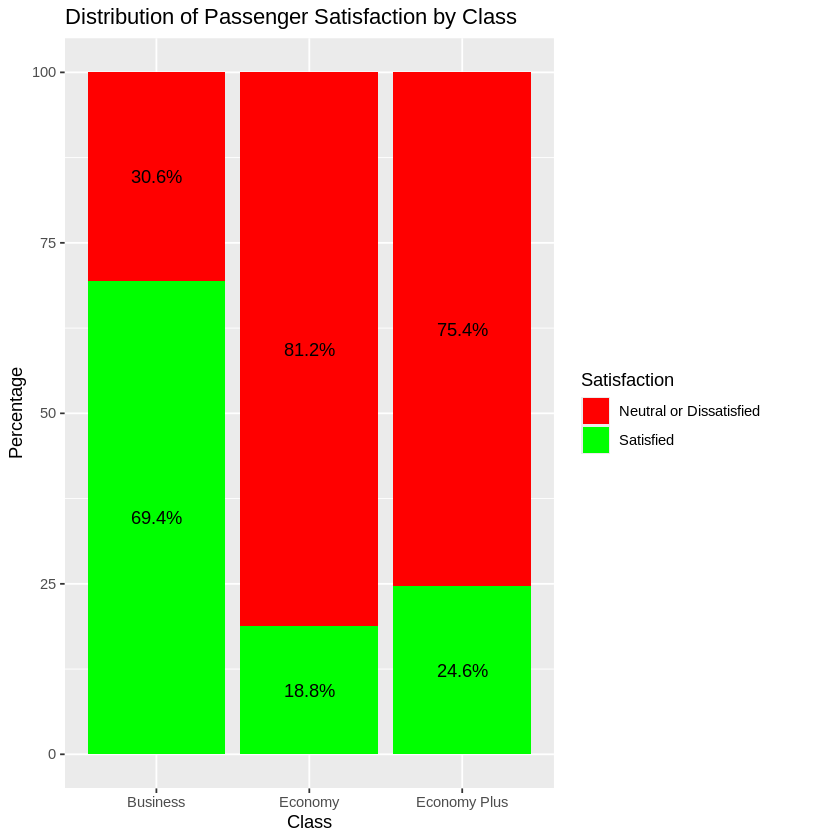

In [ ]:
# Create a summary dataframe with percentages for Class
summary_data_class <- with(airline, prop.table(table(Class, Satisfaction), margin = 1) * 100)
# Convert summary dataframe to long format for Class
summary_data_class_long <- reshape2::melt(summary_data_class)
# Bar chart for Class with percentages
ggplot(summary_data_class_long, aes(x = Class, y = value, fill = Satisfaction)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(value, 1), "%")), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribution of Passenger Satisfaction by Class",
       x = "Class",
       y = "Percentage") +
  scale_fill_manual(values = c("Satisfied" = "green", "Neutral or Dissatisfied" = "red"))

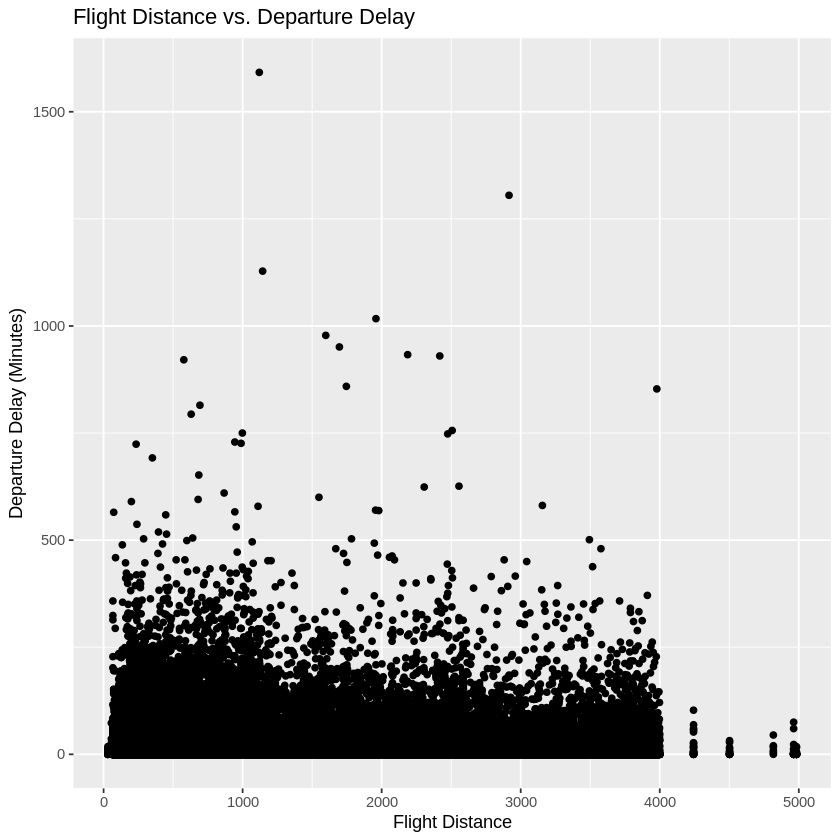

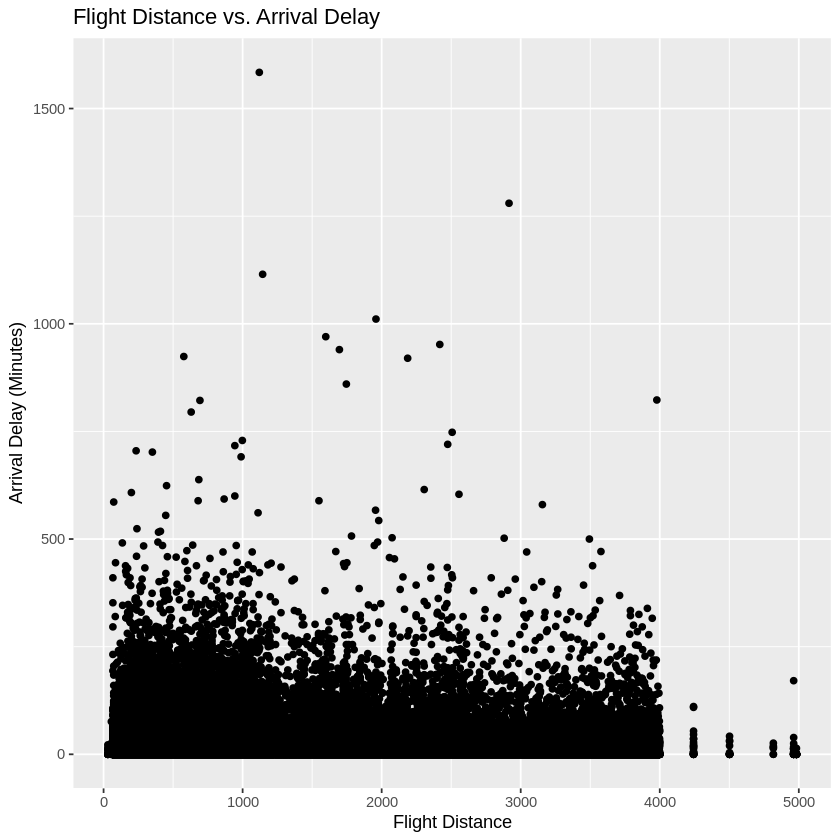

In [ ]:
#####Use scatter plots to visualize the relationship between two numerical variables, such as Flight distance vs. Departure Delay or Arrival Delay.

# Scatter plot for Flight Distance vs. Departure Delay
ggplot(airline, aes(x = Flight.Distance, y = Departure.Delay)) +
  geom_point() +
  labs(title = "Flight Distance vs. Departure Delay",
       x = "Flight Distance",
       y = "Departure Delay (Minutes)")
# Scatter plot for Flight Distance vs. Arrival Delay
ggplot(airline, aes(x = Flight.Distance, y = Arrival.Delay)) +
  geom_point() +
  labs(title = "Flight Distance vs. Arrival Delay",
       x = "Flight Distance",
       y = "Arrival Delay (Minutes)")
###### box plots to visualize the distribution of numerical variables across different levels of categorical variables such as Class.

# Create box plots for numerical variables across different levels of categorical variables
boxplot_data <- airline %>%
  select(Class, In.flight.Wifi.Service, Food.and.Drink, In.flight.Entertainment, Seat.Comfort, Satisfaction)

In [ ]:
# Melt the data for box plot
melted_data <- melt(boxplot_data, id.vars = c("Class", "Satisfaction"))

n= 86324 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 86324 37438 Neutral or Dissatisfied (0.566308327 0.433691673)  
   2) Online.Boarding< 3.5 43478  6504 Neutral or Dissatisfied (0.850407102 0.149592898)  
     4) In.flight.Wifi.Service< 3.5 39529  3919 Neutral or Dissatisfied (0.900857598 0.099142402)  
       8) In.flight.Wifi.Service>=0.5 38082  2481 Neutral or Dissatisfied (0.934851111 0.065148889) *
       9) In.flight.Wifi.Service< 0.5 1447     9 Satisfied (0.006219765 0.993780235) *
     5) In.flight.Wifi.Service>=3.5 3949  1364 Satisfied (0.345403900 0.654596100) *
   3) Online.Boarding>=3.5 42846 11912 Satisfied (0.278018952 0.721981048)  
     6) Type.of.Travel=Personal 8666  1886 Neutral or Dissatisfied (0.782367874 0.217632126)  
      12) In.flight.Wifi.Service< 4.5 7760   980 Neutral or Dissatisfied (0.873711340 0.126288660) *
      13) In.flight.Wifi.Service>=4.5 906     0 Satisfied (0.000000000 1.000000000) *
     7) Type.of.Travel=B

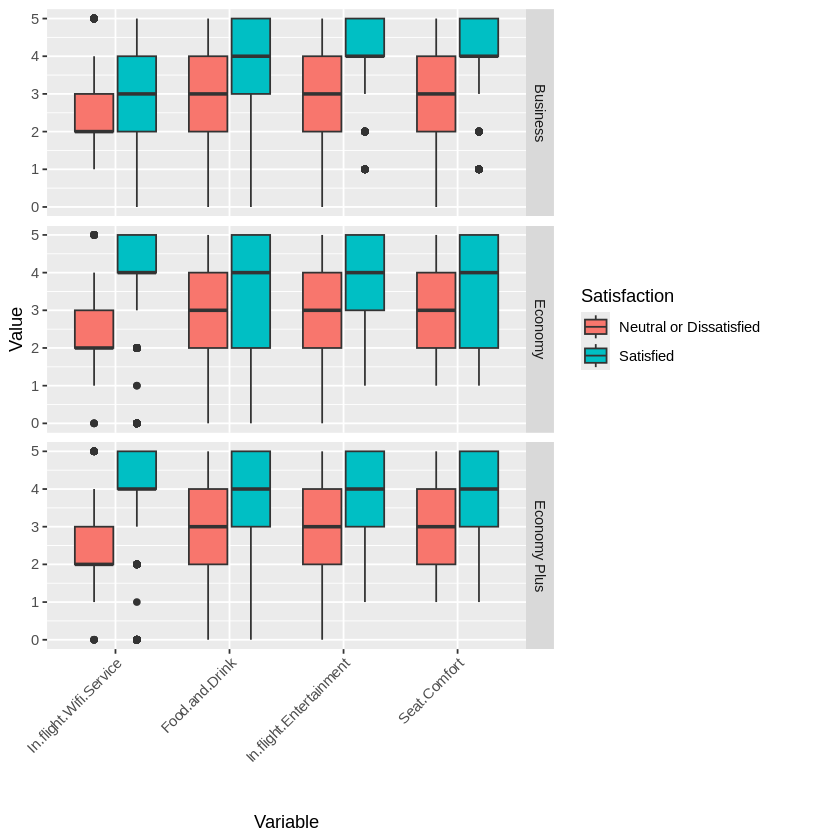

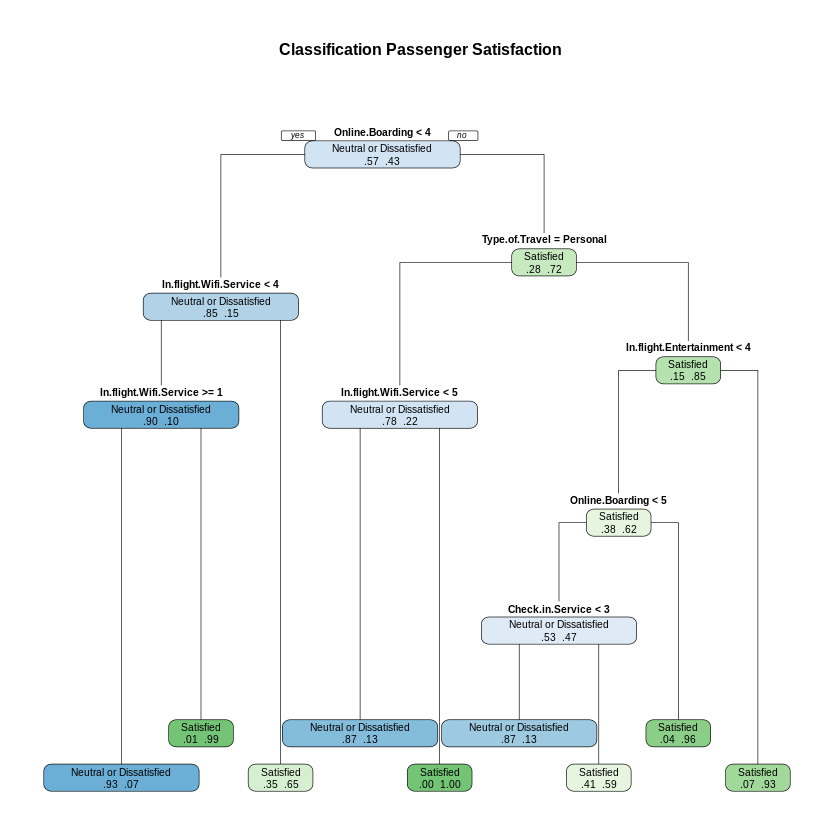

In [ ]:
# Plot the box plots
ggplot(melted_data, aes(x = variable, y = value, fill = Satisfaction)) +
  geom_boxplot() +
  facet_grid(Class ~ ., scales = "free") +
  labs(x = "Variable", y = "Value", fill = "Satisfaction") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Classification Analysis
# Use the train index set to split the dataset
#  satisfaction.train for building the model
#  satisfaction.test for testing the model
airline_new <- airline[,-1]
set.seed(1000) # for reproducible results
train <- sample(1:nrow(airline_new), nrow(airline_new)*(2/3)) # replace=FALSE by default

satisfaction.train <- airline_new[train,]
satisfaction.test <- airline_new[-train,]
#Goal 1
fit <- rpart(Satisfaction ~ ., # formula, all predictors will be considered in splitting
             data=satisfaction.train, # dataframe used
             method="class",  # treat churn as a categorical variable, default
             control=rpart.control(xval=0, minsplit=1000), # xval: num of cross validation for gini estimation # minsplit=1000: stop splitting if node has 1000 or fewer obs
             parms=list(split="gini"))  # criterial for splitting: gini default, entropy if set parms=list(split="information")

fit

rpart.plot(fit, type = 1, extra = 4, main="Classification Passenger Satisfaction")

In [ ]:
# extract the vector of predicted class for each observation in satisfaction.train
satisfaction.pred <- predict(fit, satisfaction.test, type="class")
# extract the actual class of each observation in chur.train
satisfaction.actual <- satisfaction.test$Satisfaction

confusion.matrix <- table(satisfaction.pred, satisfaction.actual)
confusion.matrix
addmargins(confusion.matrix)
pt <- prop.table(confusion.matrix)
pt

                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied Satisfied
  Neutral or Dissatisfied                   21730      1897
  Satisfied                                  2609     16927

,Neutral or Dissatisfied,Satisfied,Sum
Neutral or Dissatisfied,21730,1897,23627
Satisfied,2609,16927,19536
Sum,24339,18824,43163


                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied  Satisfied
  Neutral or Dissatisfied              0.50344045 0.04394968
  Satisfied                            0.06044529 0.39216459

In [ ]:
#accuracy
pt[1,1] + pt[2,2]
# On Training model the accuracy comes out to be 88.46%

# Testing the model on test data
# extract the predicted class of each observation in satisfaction.test
satisfaction.pred <- predict(fit, satisfaction.test, type="class")
# extract the actual class of each observation in satisfaction.test
satisfaction.actual <- satisfaction.test$satisfaction


[1] 0.895605

In [ ]:
# now build the "confusion matrix"
# which is the contingency matrix of predicted vs actual
# use this order: predicted then actual
satisfaction.actual <- satisfaction.test$Satisfaction
confusion.matrix <- table(satisfaction.pred, satisfaction.actual)
confusion.matrix
tp <- confusion.matrix[2,2];tp
tn <- confusion.matrix[1,1];tn
fp <- confusion.matrix[2,1];fp
fn <- confusion.matrix[1,2];fn

accuracy <- (tp + tn)/(tp + tn + fp + fn);accuracy
# TPR = Recall = Sensitivity
TPR <- tp/(fn+tp);TPR
# TNR = Specificity
TNR <- tn/(fp+tn);TNR
# FPR
FPR <- fp/(fp+tn);FPR
# FNR
FNR <- fn/(fn+tp);FNR
#The first node of Decision tree is the Online.boarding factor , meaning it has the highest information gain fllowing Inflight.wifi.service and Type of travel which further drives satisfaction of passengers
#Accuracy is 88.38% for the test data

#Goal 2
#Customer Satisfaction based on Time Delays, Flight distance, Checkin, Boarding Service and Flight Class

#logistic
logit.reg <- glm(Satisfaction ~ Online.Boarding + Check.in.Service + Departure.Delay +
                   Arrival.Delay + Departure.and.Arrival.Time.Convenience + Flight.Distance + Class,
                 data = satisfaction.train, family = "binomial")
summary(logit.reg)
# use predict() with type = "response" to compute predicted probabilities.
logitPredict <- predict(logit.reg, satisfaction.test, type = "response")
# we choose 0.5 as the cutoff here for 1 vs. 0 classes
logitPredictClass <- ifelse(logitPredict > 0.5, 1, 0)

                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied Satisfied
  Neutral or Dissatisfied                   21730      1897
  Satisfied                                  2609     16927

[1] 16927

[1] 21730

[1] 2609

[1] 1897

[1] 0.895605

[1] 0.8992244

[1] 0.8928058

[1] 0.1071942

[1] 0.1007756


Call:
glm(formula = Satisfaction ~ Online.Boarding + Check.in.Service + 
    Departure.Delay + Arrival.Delay + Departure.and.Arrival.Time.Convenience + 
    Flight.Distance + Class, family = "binomial", data = satisfaction.train)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -2.952e+00  4.229e-02 -69.805  < 2e-16
Online.Boarding                         8.549e-01  8.176e-03 104.551  < 2e-16
Check.in.Service                        2.711e-01  7.377e-03  36.743  < 2e-16
Departure.Delay                         2.548e-03  9.223e-04   2.762  0.00574
Arrival.Delay                          -6.621e-03  9.107e-04  -7.271 3.58e-13
Departure.and.Arrival.Time.Convenience -1.380e-01  6.090e-03 -22.661  < 2e-16
Flight.Distance                         1.712e-04  9.998e-06  17.120  < 2e-16
ClassEconomy                           -1.790e+00  2.062e-02 -86.843  < 2e-16
ClassEconomy Plus                      -1.408e+00  3

In [ ]:
# evaluate classifier on test
actual <- satisfaction.test$Satisfaction
predict <- logitPredictClass
cm <- table(predict, actual)
cm

       actual
predict Neutral or Dissatisfied Satisfied
      0                   20501      4795
      1                    3838     14029

In [ ]:
# consider class "1" as positive
tp <- cm[2,2]
tn <- cm[1,1]
fp <- cm[2,1]
fn <- cm[1,2]
# accuracy
(tp + tn)/(tp + tn + fp + fn)

[1] 0.7999907

In [ ]:
# TPR = Recall = Sensitivity
tp/(fn+tp)
# TNR = Specificity
tn/(fp+tn)
# FPR
fp/(fp+tn)
# FNR
fn/(fn+tp)
# Pvalue is less than 0.05 for all variables except Departure Delay in minutes, so the rest of the factors are significantly affecting the passenger satisfaction except Departure Delay in minutes
# Accuracy of the model 79.9%

# create ROC curve
roc_logit <- rocit(score = logitPredict, class = actual)

[1] 0.745272

[1] 0.8423107

[1] 0.1576893

[1] 0.254728

In [ ]:
# check AUC, Cutoff, TPR, FPR(=1-Specificity)
result_logit <- data.frame(cbind(AUC=roc_logit$AUC, Cutoff=roc_logit$Cutoff,
                                 TPR=roc_logit$TPR, FPR=roc_logit$FPR))
head(result_logit)
tail(result_logit)


,AUC,Cutoff,TPR,FPR
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8711239,Inf,0.000000e+00,0
2,0.8711239,0.9665109,5.312367e-05,0
3,0.8711239,0.9663115,1.062473e-04,0
4,0.8711239,0.9661123,1.593710e-04,0
5,0.8711239,0.9655012,2.124947e-04,0
6,0.8711239,0.9650132,2.656184e-04,0


,AUC,Cutoff,TPR,FPR
,<dbl>,<dbl>,<dbl>,<dbl>
42108,0.8711239,0.005010670,0.9999469,0.9998357
42109,0.8711239,0.004997827,1.0000000,0.9998357
42110,0.8711239,0.004724315,1.0000000,0.9998767
42111,0.8711239,0.004078195,1.0000000,0.9999178
42112,0.8711239,0.004068426,1.0000000,0.9999589
42113,0.8711239,0.002160039,1.0000000,1.0000000


In [ ]:
# find the optimal point (Youden Index point)
result_logit$diff <- result_logit$TPR - result_logit$FPR
bestcutoff <- result_logit[which.max(result_logit[, c("diff")]), ]
bestcutoff$Cutoff #0.567


[1] 0.584336

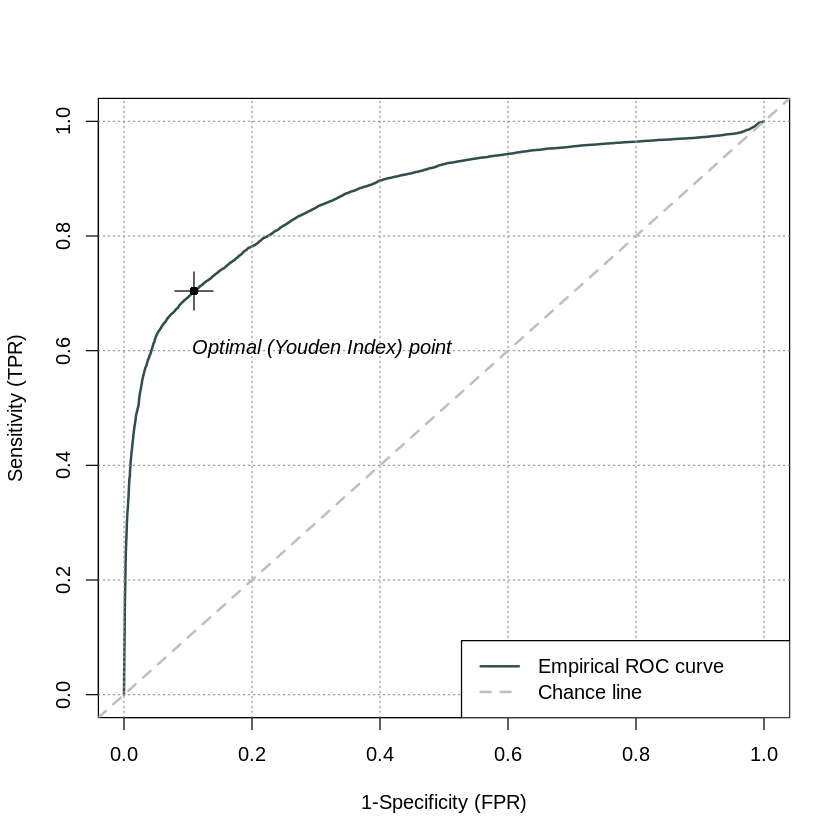

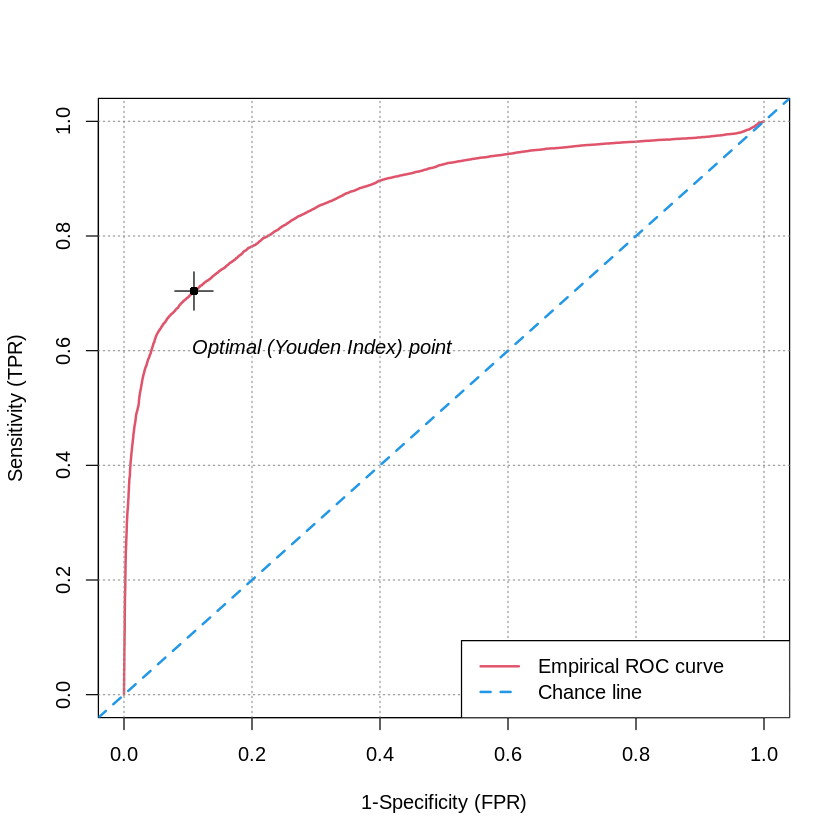

[1] 0.8711239

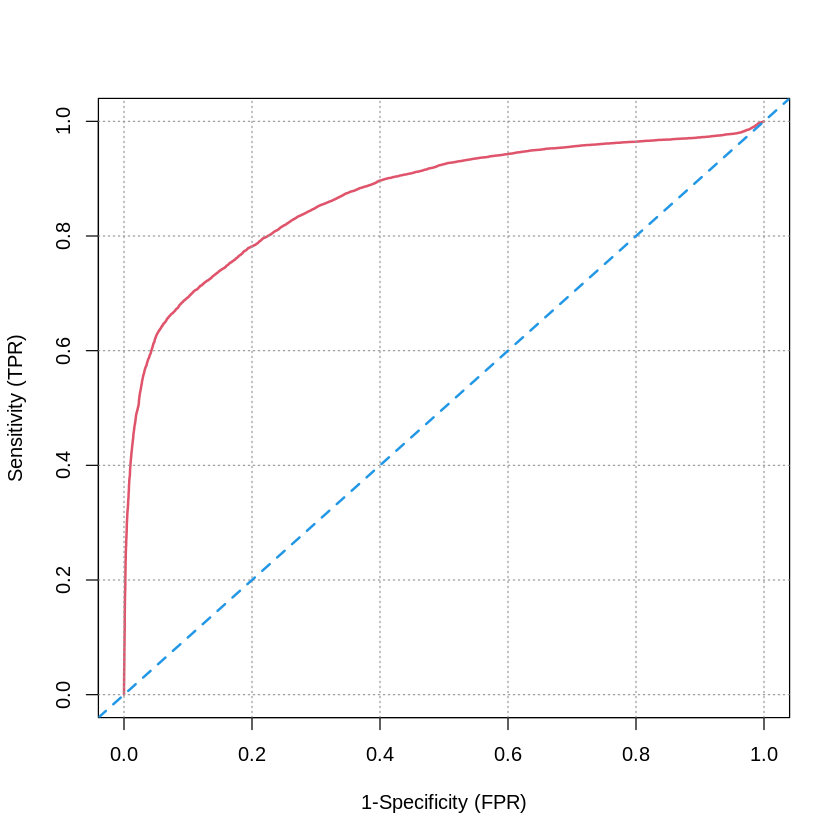

In [ ]:
# plot ROC
plot(roc_logit)  # default
plot(roc_logit, YIndex = T, col = c(2,4)) # Changing color
plot(roc_logit, YIndex = F, col = c(2,4),legend = F) # disable legend
roc_logit$AUC #0.870


In [ ]:
#Testing other classifier's performance
# Naive Bayes Classifier
install.packages("naivebayes")
library(naivebayes)
fit.nb.CV <- train(Satisfaction ~ Online.Boarding + Check.in.Service + Departure.Delay +
                     Arrival.Delay + Departure.and.Arrival.Time.Convenience + Flight.Distance + Class ,
                   data = satisfaction.train,
                   method="naive_bayes",
                   trControl=trainControl(method="cv", number=10))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

naivebayes 1.0.0 loaded

For more information please visit: 

https://majkamichal.github.io/naivebayes/



In [ ]:
# Evaluate Performance using Confusion Matrix
actual <- satisfaction.test$Satisfaction
# predict class membership
nbPredictClass <- predict(fit.nb.CV, satisfaction.test, type = "raw")
cm <- table(nbPredictClass, actual)
confusionMatrix(nbPredictClass, actual, positive="Satisfied")
# Pvalue is less than 0.05 , so these factors are significantly affecting the passenger satisfaction
# Accuracy is 78.23% which is less than logistic

Confusion Matrix and Statistics

                         Reference
Prediction                Neutral or Dissatisfied Satisfied
  Neutral or Dissatisfied                   17446      2359
  Satisfied                                  6893     16465
                                          
               Accuracy : 0.7856          
                 95% CI : (0.7817, 0.7895)
    No Information Rate : 0.5639          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5758          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8747          
            Specificity : 0.7168          
         Pos Pred Value : 0.7049          
         Neg Pred Value : 0.8809          
             Prevalence : 0.4361          
         Detection Rate : 0.3815          
   Detection Prevalence : 0.5412          
      Balanced Accura

n= 86324 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 86324 37438 Neutral or Dissatisfied (0.566308327 0.433691673)  
   2) Class=Economy,Economy Plus 45050  8797 Neutral or Dissatisfied (0.804728080 0.195271920)  
     4) In.flight.Wifi.Service< 3.5 32950  1543 Neutral or Dissatisfied (0.953171472 0.046828528)  
       8) In.flight.Wifi.Service>=0.5 32030   632 Neutral or Dissatisfied (0.980268498 0.019731502) *
       9) In.flight.Wifi.Service< 0.5 920     9 Satisfied (0.009782609 0.990217391) *
     5) In.flight.Wifi.Service>=3.5 12100  4846 Satisfied (0.400495868 0.599504132)  
      10) In.flight.Wifi.Service< 4.5 8565  3743 Neutral or Dissatisfied (0.562988908 0.437011092) *
      11) In.flight.Wifi.Service>=4.5 3535    24 Satisfied (0.006789250 0.993210750) *
   3) Class=Business 41274 12633 Satisfied (0.306076465 0.693923535)  
     6) In.flight.Entertainment< 3.5 15138  5848 Neutral or Dissatisfied (0.613687409 0.386312591)  
      12) In.flig

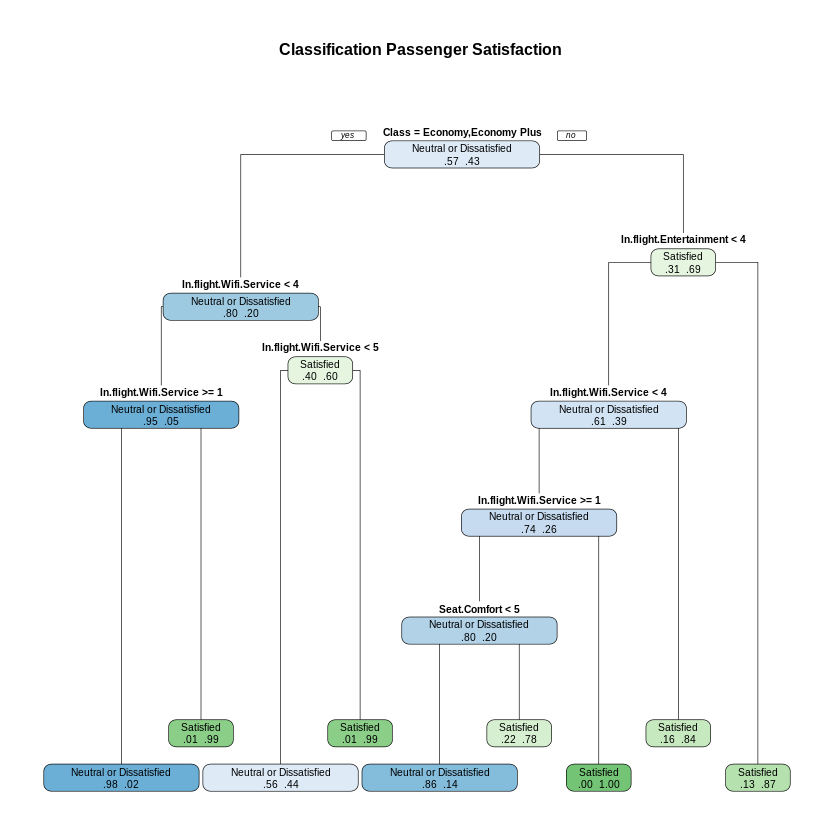

In [ ]:
#Goal 3
#Customer Satisfaction Based on Inflight services

fit <- rpart(Satisfaction ~ Age + Class + In.flight.Wifi.Service + Food.and.Drink + Seat.Comfort + In.flight.Entertainment +
               Leg.Room.Service + Cleanliness, # formula, all predictors will be considered in splitting
             data=satisfaction.train, # dataframe used
             method="class",  # treat churn as a categorical variable, default
             control=rpart.control(xval=0, minsplit=1000), # xval: num of cross validation for gini estimation # minsplit=1000: stop splitting if node has 1000 or fewer obs
             parms=list(split="gini"))  # criterial for splitting: gini default, entropy if set parms=list(split="information")

fit

rpart.plot(fit, type = 1, extra = 4, main="Classification Passenger Satisfaction")

In [ ]:
# extract the vector of predicted class for each observation in satisfaction.train
satisfaction.pred <- predict(fit, satisfaction.train, type="class")
# extract the actual class of each observation in chur.train
satisfaction.actual <- satisfaction.train$Satisfaction

confusion.matrix <- table(satisfaction.pred, satisfaction.actual)
confusion.matrix
addmargins(confusion.matrix)
pt <- prop.table(confusion.matrix)
pt
#accuracy
pt[1,1] + pt[2,2]

                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied Satisfied
  Neutral or Dissatisfied                   44756      5781
  Satisfied                                  4130     31657

,Neutral or Dissatisfied,Satisfied,Sum
Neutral or Dissatisfied,44756,5781,50537
Satisfied,4130,31657,35787
Sum,48886,37438,86324


                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied  Satisfied
  Neutral or Dissatisfied              0.51846532 0.06696863
  Satisfied                            0.04784301 0.36672304

[1] 0.8851884

In [ ]:
# Testing the model on test data
# extract the predicted class of each observation in satisfaction.test
satisfaction.pred <- predict(fit, satisfaction.test, type="class")
# extract the actual class of each observation in satisfaction.test
satisfaction.actual <- satisfaction.test$Satisfaction

In [ ]:
# now build the "confusion matrix"
# which is the contingency matrix of predicted vs actual
# use this order: predicted then actual
confusion.matrix <- table(satisfaction.pred, satisfaction.actual)
confusion.matrix
tp <- confusion.matrix[2,2];tp
tn <- confusion.matrix[1,1];tn
fp <- confusion.matrix[2,1];fp
fn <- confusion.matrix[1,2];fn

accuracy <- (tp + tn)/(tp + tn + fp + fn);accuracy
# TPR = Recall = Sensitivity
TPR <- tp/(fn+tp);TPR
# TNR = Specificity
TNR <- tn/(fp+tn);TNR
# FPR
FPR <- fp/(fp+tn);FPR
# FNR
FNR <- fn/(fn+tp);FNR

                         satisfaction.actual
satisfaction.pred         Neutral or Dissatisfied Satisfied
  Neutral or Dissatisfied                   22219      2878
  Satisfied                                  2120     15946

[1] 15946

[1] 22219

[1] 2120

[1] 2878

[1] 0.8842064

[1] 0.8471101

[1] 0.912897

[1] 0.087103

[1] 0.1528899